<a href="https://colab.research.google.com/github/anuraagbarde/MachineLearning/blob/main/2018BCS010_ML_LAB_asg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE LEARNING LAB ASSIGNMENT

##ANURAAG BARDE 2018BCS 010 

# Import and Global Init

In [62]:
import numpy as np;
import matplotlib.pyplot as plt;
import math;
from random import randrange

# Global variables
n=20             # No. of points for the Dataset
xTrainData=np.zeros(n)     # Independent points 
yTrainData=np.zeros(n)     # Dependent points
variance = 0.15

# Create Training Dataset

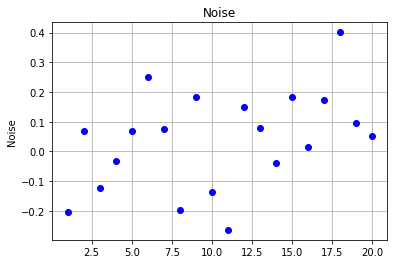

In [63]:
# Normal distribution Noise Generation
noise=np.random.normal(0,variance,n); #(mean, variance, no. of points)
xNoise = np.arange(1,n+1,1)

# Plot of Noise
plt.plot(xNoise,noise,'bo');
plt.xlabel('');
plt.ylabel('Noise');
plt.title('Noise');
plt.grid()
plt.show()

In [64]:
# Generation of Random Dataset as training => y = sin(x) + noise
for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    xTrainData[i] = temp
    yTrainData[i] = math.sin(temp)+noise[i]

xTrainData = xTrainData.reshape(n,1)
yTrainData = yTrainData.reshape(n,1)

print('Randomly Generated Train Dataset with n points')
# print('X | Y');
# for i in range(0,n):
#   print(xTrainData[i] , ' | ' , yTrainData[i]);


Randomly Generated Train Dataset with n points


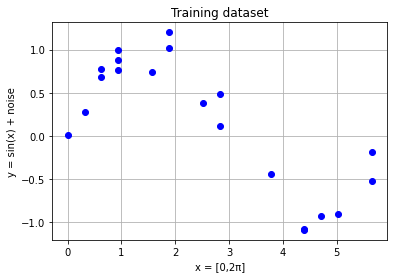

In [65]:
# Plot of Training Dataset
plt.plot(xTrainData,yTrainData,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training dataset');
plt.grid()
plt.show()

# Create Testing Dataset

In [66]:
# Generation of Random Dataset as training => y = sin(x)

xTestData=np.zeros(n);       # Independent points 
yTestData=np.zeros(n);       # Dependent points

for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    xTestData[i] = temp
    yTestData[i] = math.sin(temp)

xTestData = xTestData.reshape(n,1)
yTestData = yTestData.reshape(n,1)

print('Randomly Generated Test Dataset with 20 points')
# print('X | Y');
# for i in range(0,n):
#   print(xTestData[i] , ' | ' , yTestData[i]);


Randomly Generated Test Dataset with 20 points


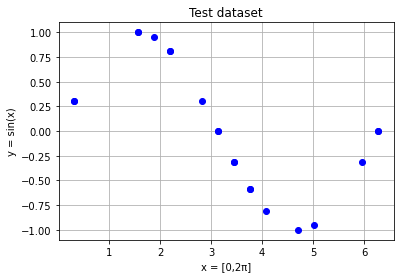

In [67]:
# Plot of Test Dataset
plt.plot(xTestData,yTestData,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x)');
plt.title('Test dataset');
plt.grid()
plt.show()

# Prediction

## Direct linear regression

In [68]:
# Fitting Direct Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xTrainData, yTrainData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
yPredictData = regressor.predict(xTestData)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yTestData, yPredictData, squared=True)

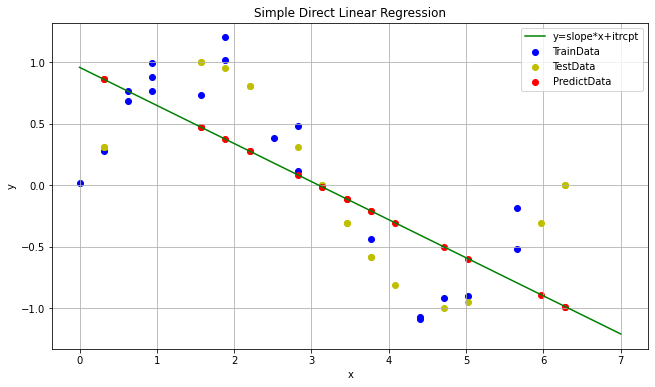

mse = 0.27004226438055756


In [70]:
slope = regressor.coef_[0][0]
intercept = regressor.intercept_[0]
# print(slope)
# print(intercept)


plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictData,color = 'r', label='PredictData');

xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept

plt.plot(xPredictionLine, yPredictionLine, '-g', label='y=slope*x+itrcpt')


plt.title('Simple Direct Linear Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()

print('mse =',mse)

## Multiple Linear Regression

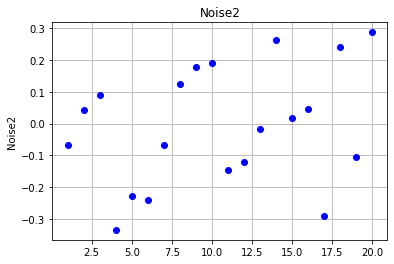

Randomly Generated Train Dataset with n points


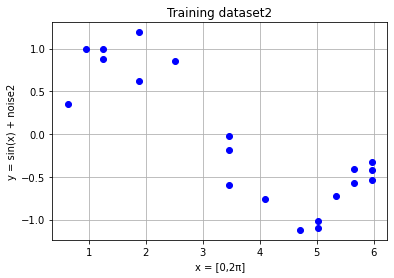

In [71]:
# make x2
# it will be same as creating x1

x2TrainData=np.zeros(n);       # Independent points 
y2TrainData=np.zeros(n);       # Dependent points

# Normal distribution Noise Generation
noise2=np.random.normal(0,variance,n); #(mean, variance, no. of points)
xNoise = np.arange(1,n+1,1)

# Plot of Noise
plt.plot(xNoise,noise2,'bo');
plt.xlabel('');
plt.ylabel('Noise2');
plt.title('Noise2');
plt.grid()
plt.show()

# Generation of Random Dataset as training => y = sin(x) + noise2
for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    x2TrainData[i] = temp
    y2TrainData[i] = math.sin(temp)+noise2[i]
x2TrainData = x2TrainData.reshape(n,1)
y2TrainData = y2TrainData.reshape(n,1)

print('Randomly Generated Train Dataset with n points')
# print('X | Y');
# for i in range(0,n):
#   print(x2TrainData[i] , ' | ' , y2TrainData[i]);

# Plot of Training Dataset
plt.plot(x2TrainData,y2TrainData,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x) + noise2');
plt.title('Training dataset2');
plt.grid()
plt.show()

In [72]:
xCombineTrainData = np.c_[xTrainData,x2TrainData]
xCombineTrainData.shape

yCombineTrainData = np.c_[yTrainData,y2TrainData]
yCombineTrainData.shape

(20, 2)

In [73]:
# Fitting Direct Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(xCombineTrainData, yTrainData)

yPredictData = regressor.predict(np.c_[xTestData,xTestData])

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yTestData, yPredictData, squared=True)
print('mse =',mse)

mse = 0.2994983494609789


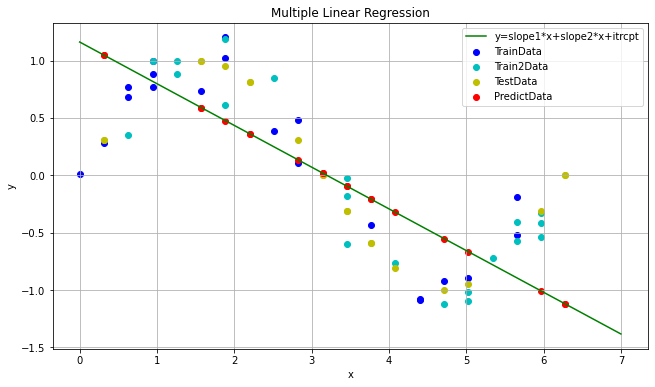

mse = 0.2994983494609789


In [74]:
slope1 = regressor.coef_[0][0]
slope2 = regressor.coef_[0][1]
intercept = regressor.intercept_[0]
# print(slope1,slope2)
# print(intercept)


plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(x2TrainData,y2TrainData,color = 'c' , label='Train2Data');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictData,color = 'r', label='PredictData');

xPredictionLineMR = np.linspace(0,7,n)
yPredictionLineMR = slope1*xPredictionLineMR + slope2*xPredictionLineMR +intercept

plt.plot(xPredictionLineMR, yPredictionLineMR, '-g', label='y=slope1*x+slope2*x+itrcpt')


plt.title('Multiple Linear Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()

print('mse =',mse)

##Polynomial Regression of degree M

In [75]:
from sklearn.preprocessing import PolynomialFeatures

# Train data poly data
degree_m = 2
poly = PolynomialFeatures(degree = degree_m)
x_poly = poly.fit_transform(xTrainData)
poly.fit(x_poly, yTrainData)

# Test data poly data
polyTest = PolynomialFeatures(degree = degree_m)
x_test_poly = polyTest.fit_transform(xTestData)
polyTest.fit(x_test_poly)


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [76]:
# Training linear regression using train poly data
from sklearn.linear_model import LinearRegression
polyRegressor = LinearRegression()
polyRegressor.fit(x_poly, yTrainData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

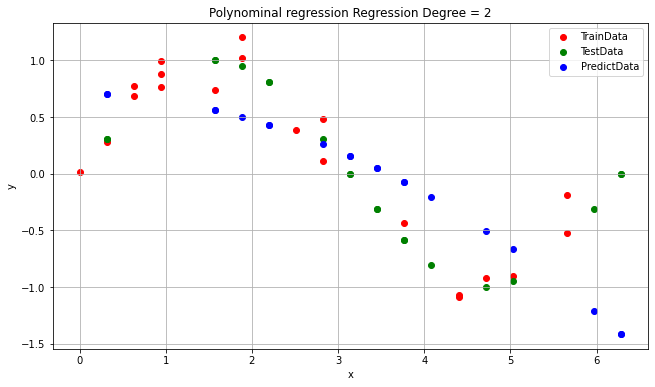

mse = 0.3757857080689568


In [77]:
# prediction of test poly data using linear(poly) regression model
y_pred_poly = polyRegressor.predict(x_test_poly)

from sklearn.metrics import mean_squared_error
msePoly = mean_squared_error(yTestData, y_pred_poly, squared=True)

# plotting
plt.figure(figsize=(10.67, 6))

plt.scatter(xTrainData, yTrainData ,c='r', label='TrainData')
plt.scatter(xTestData, yTestData ,c='g', label='TestData')
plt.scatter(xTestData, y_pred_poly, c='b', label='PredictData')

plt.title('Polynominal regression Regression Degree = '+ str(degree_m));
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()

print('mse =', msePoly )


##Ridge regression



In [78]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rr = Ridge(alpha = 1.0)
rr.fit(xTrainData, yTrainData)
yPredictDataRidge = rr.predict(xTestData)

mseRidge = mean_squared_error(yTestData, yPredictDataRidge, squared=True)

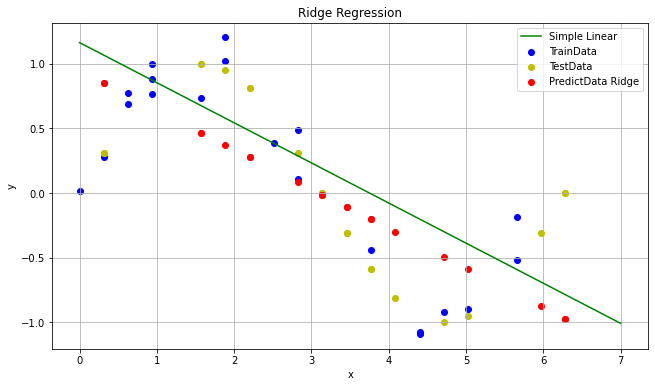

mse = 0.2673400277329814


In [79]:
plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictDataRidge,color = 'r', label='PredictData Ridge');


xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept
plt.plot(xPredictionLine, yPredictionLine, '-g', label='Simple Linear')



plt.title('Ridge Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()


print('mse =',mseRidge)

##Lasso Regression

In [80]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lr = Lasso(alpha=0.1)
lr.fit(xTrainData, yTrainData)
yPredictDataLasso = lr.predict(xTestData)

mseLasso = mean_squared_error(yTestData, yPredictDataLasso, squared=True)

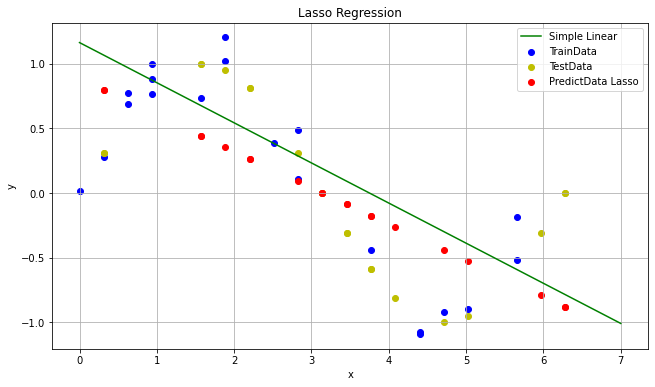

mse = 0.2549825618302623


In [81]:
plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictDataLasso,color = 'r', label='PredictData Lasso');


xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept
plt.plot(xPredictionLine, yPredictionLine, '-g', label='Simple Linear')



plt.title('Lasso Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()


print('mse =',mseLasso)

##Elastic Net Regression

In [82]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
enet = ElasticNet(alpha = 0.1)
enet.fit(xTrainData, yTrainData)
yPredictDataEnet = enet.predict(xTestData)

mseEnet = mean_squared_error(yTestData, yPredictDataEnet, squared=True)


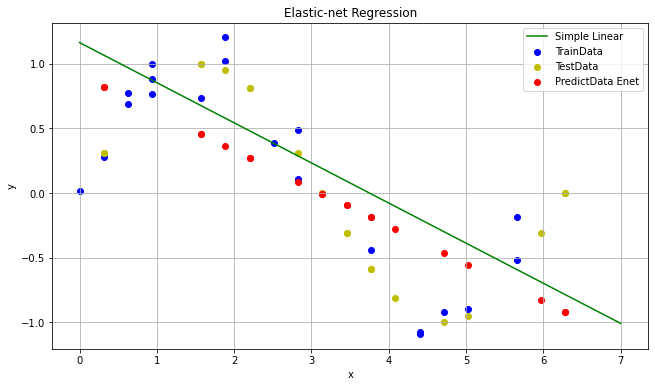

mse = 0.2596110436635902


In [83]:
plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictDataEnet,color = 'r', label='PredictData Enet');


xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept
plt.plot(xPredictionLine, yPredictionLine, '-g', label='Simple Linear')



plt.title('Elastic-net Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()


print('mse =',mseEnet)

##Bridge Regression

In [84]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
bridge = BayesianRidge() 
bridge.fit(xTrainData, yTrainData)

# Predicting test set
y_pred_bridge = bridge.predict(xTestData)

mseBridge = mean_squared_error(yTestData, y_pred_bridge, squared=True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


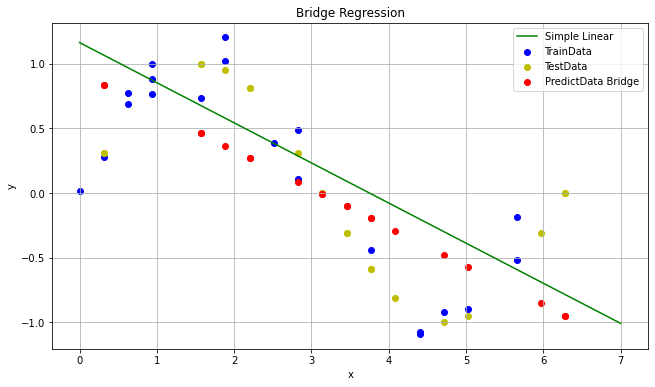

MSE =  0.2636092283232068


In [85]:
plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,y_pred_bridge,color = 'r', label='PredictData Bridge');


xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept
plt.plot(xPredictionLine, yPredictionLine, '-g', label='Simple Linear')



plt.title('Bridge Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()

print('MSE = ',mseBridge)

#END

This file was made by [@anuraagbarde. Checkout gitub repo for detail commit history ](https://github.com/anuraagbarde/MachineLearning)(https://github.com/anuraagbarde/MachineLearning). The github page might be private(showing 404 error), so you can ask for access, I will be happy to give.

Comment: Here variance = 0.15 was used to create the data set, using 1 meant +-100% error(since sin x can go +-1, even though the noise is normal distributed, it will still be a very random dataset), thats just a random data set. If needed variance can be changed using the variance variable in the Top Global and Init section and the results can be run again without any issue.